In [1]:
using Pkg
Pkg.activate("..") 
Pkg.instantiate()
Pkg.resolve()

using LSODA,DifferentialEquations,JPEC, Plots, DelimitedFiles

  Activating project at `~/Desktop/JPEC`
  No Changes to `~/Desktop/JPEC/Project.toml`
  No Changes to `~/Desktop/JPEC/Manifest.toml`


In [2]:
lar_input = JPEC.Equilibrium.LarInput(10, 1, 0.001, 1.5, 2, 1, "default", 128, 128, false)

JPEC.Equilibrium.LarInput(10.0, 1.0, 0.001, 1.5, 2.0, 1.0, "default", 128, 128, false)

In [3]:
sq_in, rz_in = JPEC.Equilibrium.lar_run(lar_input)

(JPEC.SplinesMod.RealSplineType(Ptr{Nothing} @0x00000001204ec650, [8.682934522190448e-5, 0.0003469834908650275, 0.0007804216571205545, 0.0013869981158246953, 0.00216649771732363, 0.003118641436876229, 0.004243087880758738, 0.005539434077339375, 0.007007216114005258, 0.008645909762575139  …  0.899448974892095, 0.9106051275582959, 0.9217671272924324, 0.9329341766253691, 0.9441054953426861, 0.9552803202460893, 0.9664579049149282, 0.9776375194661567, 0.988818450311505, 1.0000000000000022], [9.999997927148243 0.000499939909263041 1.5000898507093468; 9.999991719551208 0.0004997596587188468 1.5003596562860342; … ; 9.988421733944673 1.1925522940860181e-7 2.9746365776780803; 9.988336160471356 1.7645466826380788e-23 2.997776433655482], 128, 3, 4, Matrix{Float64}(undef, 0, 0), [-0.023867467350723436 -0.0006927916653570928 1.0368712400971771; -0.023855205217004998 -0.0006929077032008842 1.0372838342731867; … ; -0.007607574523335891 -2.1247652757229208e-5 2.061445213089279; -0.007699747243758146 -1

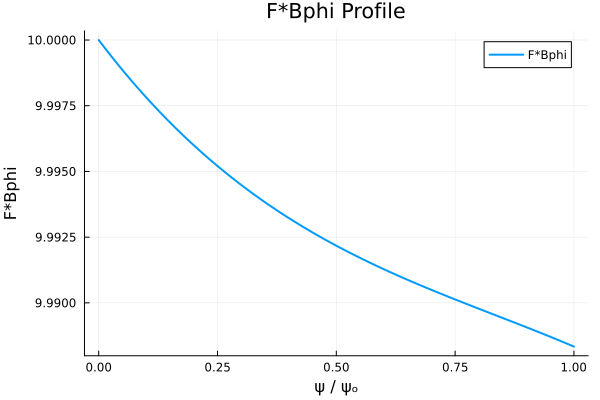

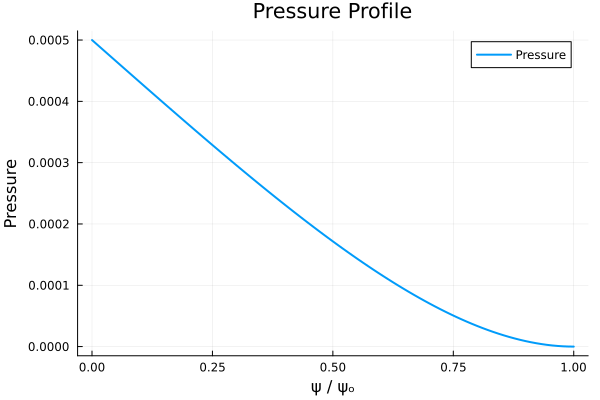

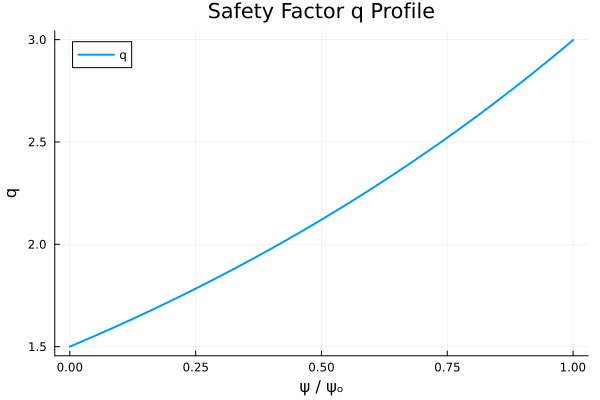

✅ Displayed plots and saved sq_in.txt


In [6]:
function save_and_plot_sq_in(sq_in, filename_prefix="sq_in")
    xs = sq_in._xs
    fs = sq_in._fs  # size = (ma+1, 3): [F*Bphi, pressure, q]

    # Save all data to a single txt file
    data = hcat(xs, fs)

    # Plot 1: F*Bphi
    p1 = plot(xs, fs[:,1], label="F*Bphi", xlabel="ψ / ψₒ", ylabel="F*Bphi", lw=2, title="F*Bphi Profile")
    display(p1)

    # Plot 2: Pressure
    p2 = plot(xs, fs[:,2], label="Pressure", xlabel="ψ / ψₒ", ylabel="Pressure", lw=2, title="Pressure Profile")
    display(p2)

    # Plot 3: q
    p3 = plot(xs, fs[:,3], label="q", xlabel="ψ / ψₒ", ylabel="q", lw=2, title="Safety Factor q Profile")
    display(p3)

    println("✅ Displayed plots and saved $filename_prefix.txt")
end

save_and_plot_sq_in(sq_in)